In [1]:
import sys
sys.path.append('..')
import quarantines as Q
import quarantines_mongo as qm
import pymongo
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
def gather_data():
    data_file = open('../quarantine_by_props_1014.pkl', 'rb')
    data = pickle.load(data_file)
    data_by_name = {}
    for datum in data:
        name = datum.get('name')
        if name not in data_by_name:
            data_by_name[name] = [] 
        data_by_name[name].append(datum)
    return data_by_name

data = gather_data()

In [3]:
def group_by_qprop(series):
    gather = {} 
    for datum in series:
        qprop = datum['quarantine_props']
        if qprop not in gather:
            gather[qprop] = [] 
        gather[qprop].append(datum)
        
    # and now modify to only collect final_R, max_I
    output = {}
    for qprop, datalist in gather.items():
        final_rs = [_['final_R'] for _ in datalist]
        max_is = [_['max_I'] for _ in datalist]
        output[qprop] = {'final_R': final_rs, 
                         'max_I': max_is}
    return output
        

In [4]:
def gather_by_name(data, name, i_or_r):
    # Gather triples of [(qprop, mean, std), ...]
    assert i_or_r in ['I', 'R']
    series = group_by_qprop(data[name])
    output = []
    def getter(doc):
        if i_or_r == 'I':
            return doc['max_I']
        else:
            return doc['final_R']
        
        
    for k, v in series.items():
        mean = np.mean(getter(v))
        std = np.std(getter(v))
        output.append((k, mean, std))
        
    return sorted(output, key=lambda trip: trip[0])
    
    

In [21]:
def plot_vs(data, name, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,8))

    i_trips = gather_by_name(data, name, 'I')
    r_trips = gather_by_name(data, name, 'R')
    qprops = [_[0] for _ in i_trips]
    Is = [_[1] / 10000 for _ in i_trips]
    
    qprops_r = [_[0] for _ in r_trips]
    Rs = [_[1] / 10000 for _ in r_trips]
    ax.plot(qprops, Is, label=name)
    ax.plot(qprops, Rs, label=name)
    


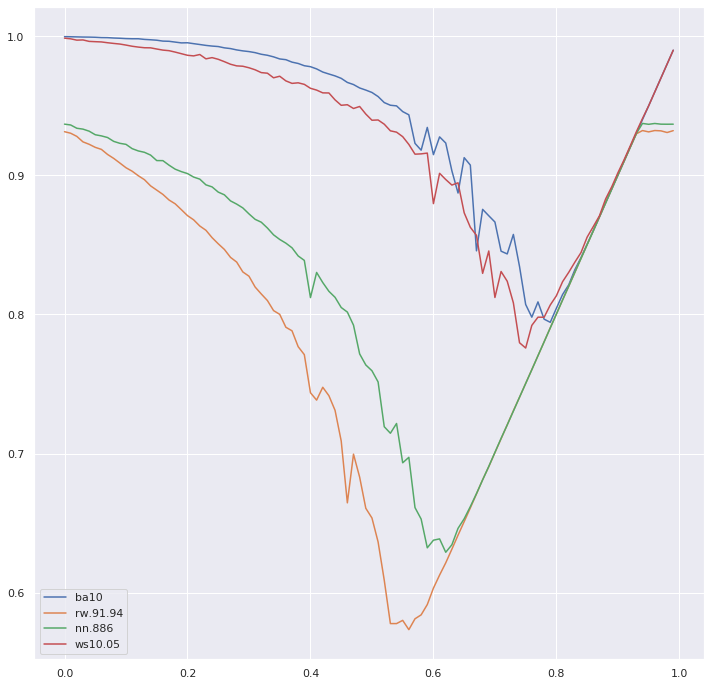

In [23]:
fig, ax = plt.subplots(figsize=(12,12))
#plot_vs(data, name='ba5', ax=ax)
plot_vs(data, name='ba10', ax=ax)
plot_vs(data, name='rw.91.94', ax=ax)
plot_vs(data, name='nn.886', ax=ax)
plot_vs(data, name='ws10.05', ax=ax)
#plot_vs(data, name='plc10.25', ax=ax)
#plot_vs(data, name='plc5.5', ax=ax)
ax.legend()

In [24]:
data.keys()

dict_keys(['ba10', 'ba5', 'plc10.25', 'plc5.5', 'rw.91.94', 'nn.886', 'ws10.05', 'fb.artist', 'fb.athletes', 'fb.company', 'fb.new_sites', 'fb.government', 'deezer.RO', 'deezer.HR', 'deezer.HU', 'arxiv.AstroPh', 'arxiv.CondMat', 'arxiv.HepPh', 'arxiv.GrQc', 'arxiv.HepTh'])

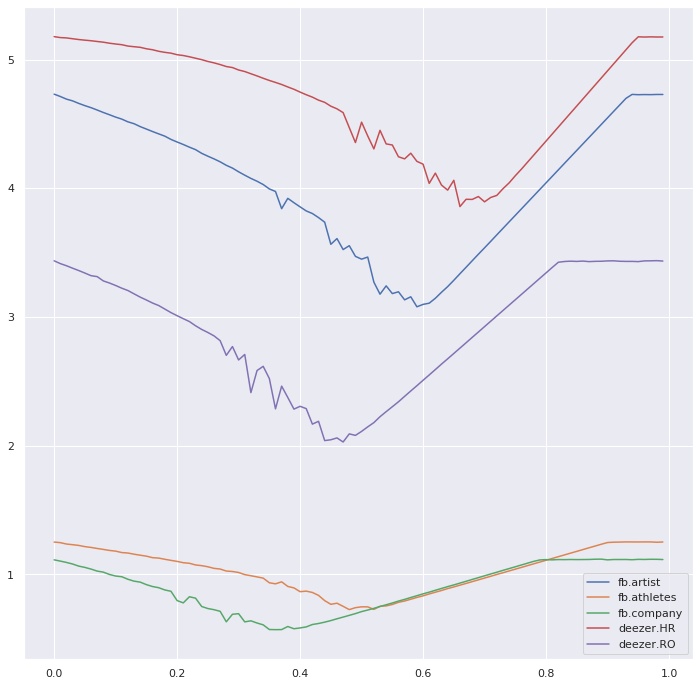

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
#plot_vs(data, name='ba5', ax=ax)
for _ in ['fb.artist', 'fb.athletes', 'fb.company','deezer.HR', 'deezer.RO']:
    plot_vs(data, name=_, ax=ax)
ax.legend()

In [ ]:
import networkx as nx 
import networkit as nk
dir(nk.nxadapter)

In [27]:
data.keys()

dict_keys(['ba10', 'ba5', 'plc10.25', 'plc5.5', 'rw.91.94', 'nn.886', 'ws10.05', 'fb.artist', 'fb.athletes', 'fb.company', 'fb.new_sites', 'fb.government', 'deezer.RO', 'deezer.HR', 'deezer.HU', 'arxiv.AstroPh', 'arxiv.CondMat', 'arxiv.HepPh', 'arxiv.GrQc', 'arxiv.HepTh'])

In [ ]:
############## HIV SCALED UP INTO NX 
def scale_hiv(scale):
    HIV = nk.nxadapter.nx2nk(nx.read_edgelist('../snap/hiv/potterat.edgelist'))
    HIV_scale = nk.generators.LFRGenerator.fit(HIV, scale=scale).generate()
    nx_HIV = nk.nxadapter.nk2nx(HIV_scale)
    return nx_HIV
    
def largest_cc(nx_G):
    conn_comps = list(nx.connected_components(nx_G))
    largest_conn_comp = max(conn_comps, key=lambda d: len(d))
    return nx_G.subgraph(largest_conn_comp)

In [ ]:
def scale_hs(scale):
    pass

In [ ]:
[(_.get_final_R(), _.get_max_I()) for _ in Q.quarantine_by_prop(G, 0.3, 0.1, 10 / len(G), [0.1], float('inf'), num_iter=5).tup_list]

In [ ]:
HIV_test = {}
for qprop in range(25):
    print(qprop, 25)
    HIV_test[qprop / 25] = [(_.get_final_R(), _.get_max_I()) for _ in Q.quarantine_by_prop(G, 0.3, 0.1, 10 / len(G), [qprop / 25], float('inf'), num_iter=5).tup_list]

In [ ]:
def split_dict(d):
    i_pairs = []
    r_pairs = [] 
    for k, v in sorted(d.items(), key=lambda p: p[0]):
        i_list = [_[1] for _ in v]
        r_list = [_[0] for _ in v]
        i_pairs.append((k, np.mean(i_list)))
        r_pairs.append((k, np.mean(r_list)))
    return i_pairs, r_pairs

i_pairs, r_pairs = split_dict(HIV_test)

In [ ]:
plt.plot(*zip(*i_pairs), c='r')
plt.plot(*zip(*r_pairs), c='b')

In [ ]:
dir(nx)

In [ ]:
nk.generators.BTERReplicator.fit(HIV, scale=5).generate()